In [69]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.datasets import load_iris

In [55]:
data = load_iris() # dataset
features = pd.DataFrame( data.data, columns = data.feature_names ) # features
target = pd.DataFrame( data.target ) # 3 classes [0, 1, 2]
features.head(5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


I will use only one feature in order to visualize model and data for more clarity, after we will use all features:

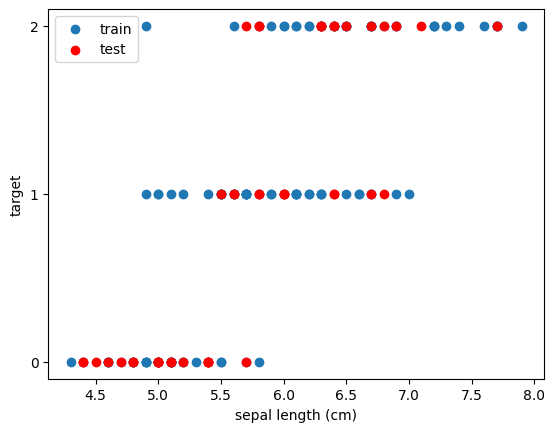

In [56]:
from sklearn.model_selection import train_test_split
single_feature = features[['sepal length (cm)']]

# Dividing data for training and testing
X_train, X_test, y_train, y_test = train_test_split( single_feature.values, target, train_size=0.7, random_state= 120 )

# Plotting for more clarity
plt.scatter( X_train, y_train, label = 'train')
plt.scatter(X_test, y_test, label = 'test', c = 'red')
plt.xlabel('sepal length (cm)')
plt.yticks([0, 1, 2]) 
plt.ylabel('target')
plt.legend()
plt.show()

c:\Users\Aziz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


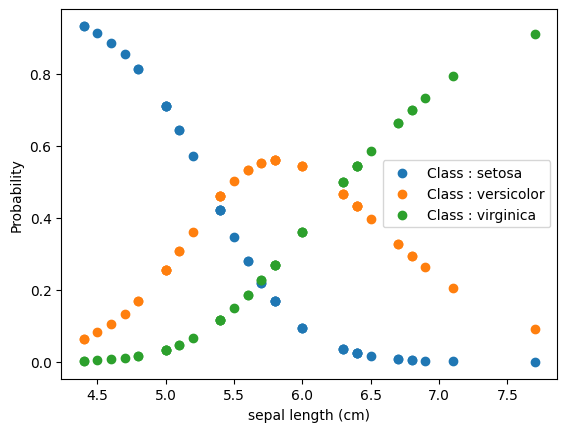

In [99]:
from sklearn.linear_model import LogisticRegression

# By default Logistic Regression used for binary classification but we can use it for multiclass classification
# Solver is optimization function( trying minimize loss function by updating model`s parameters), here it is Limited-memory Broyden-Fletcher-Goldfarb-Shanno 
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# predicting probabilities
y_pred_prob = model.predict_proba( X_test )

# predicting actual class
y_pred = model.predict( X_test )

# naming our targets for clarity
types = ['setosa', 'versicolor', 'virginica']

# visualizing probabilities for every class
for class_idx in range(y_pred_prob.shape[1]):
    plt.scatter(X_test, y_pred_prob[:, class_idx], label=f'Class : {types[class_idx]}')

plt.xlabel('sepal length (cm)')
plt.ylabel('Probability')
plt.legend()
plt.show()

In multiclass Logistic Regression it calculates probabilities for every class and choose the highest for final answer

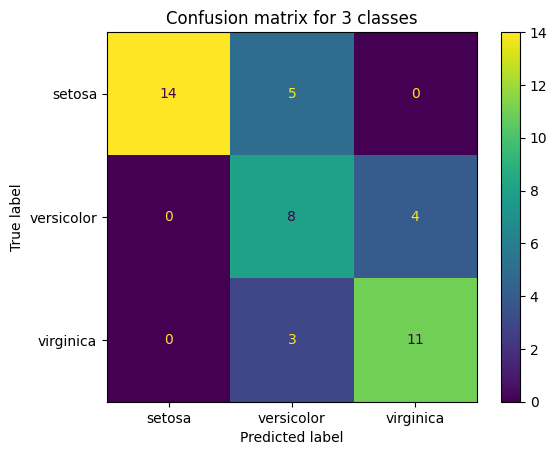

In [97]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix is great tool for observing the predicted results of model 
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=types)

disp.plot()
plt.title('Confusion matrix for 3 classes')
plt.show()

In [96]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

#metrics
def metrics( cm, y_pred, y_test ):
    # Accuracy is used to measure the performance of the model. It is the ratio of Total correct instances to the total instances. 
    accuracy = accuracy_score( y_test, y_pred )

    # Precision is a measure of how accurate a model’s positive predictions are
    precision = precision_score( y_test, y_pred, average='weighted' )

    # Recall measures the effectiveness of a classification model in identifying all relevant instances from a dataset
    recall = recall_score( y_test, y_pred, average='weighted' )

    # F1-score is used to evaluate the overall performance of a classification model
    f1_score = (2 * precision * recall) / (precision + recall)

    print( "Accuracy = {:.2f}, Precision = {:.2f}, Recall = {:.2f}, F1_Score = {:.2f}" \
          .format(accuracy, precision, recall, f1_score))

metrics (cm, y_pred, y_test)
print( "score_R2 = {}".format(model.score( X_test, y_test)))

Accuracy = 0.73, Precision = 0.78, Recall = 0.73, F1_Score = 0.76
score_R2 = 0.7333333333333333


Now I will use all of the features for creating Logistic regression, we need to remember normalize our data for more accurate results and use regularizers in order optimize our model: